# Next Word Prediction Model using Python

Next Word Prediction means predicting the most likely word or phrase that will come next in a sentence or text. It is like having an inbuilt feature on an application that suggests the next word as you type or speak. The Next Word Prediction Models are used in applications like messaging apps, search engines, virtual assistants, and autocorrect features on smartphones.

**What is the Next Word Prediction Model & How to Build it?**                                      
    

Next word prediction is a language modelling task in Machine Learning that aims to predict the most probable word or sequence of words that follows a given input context. This task utilizes statistical patterns and linguistic structures to generate accurate predictions based on the context provided.
    
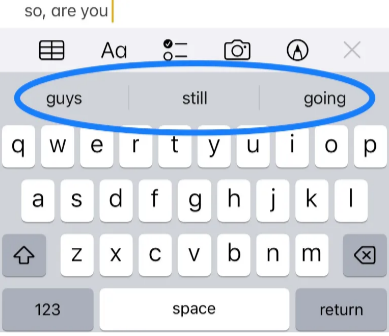
    

The Next Word Prediction models have a range of applications across various industries. For example, when we start typing a message on our phone, it suggests the next word to speed up our typing. Similarly, search engines predict and show search suggestions as we type in the search bar. Next word prediction helps us communicate faster and more accurately by anticipating what we might say or search for.
    

**To build a Next Word Prediction model:**


1. start by collecting a diverse dataset of text documents,
2. preprocess the data by cleaning and tokenizing it,
3. prepare the data by creating input-output pairs,
4. engineer features such as word embeddings,
5. select an appropriate model like an LSTM or GPT,
6. train the model on the dataset while adjusting hyperparameters,
7. improve the model by experimenting with different techniques and architectures.
    
<b> In this section, we are going to build a Next Word Prediction model using Python and Deep Learning. So, let’s start this task by importing the necessary Python libraries and the dataset.

###  Importing the necessary Python libraries and the dataset.

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [1]:
from google.colab import drive
import os
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change directory to your desired location within Google Drive
os.chdir('/content/drive/MyDrive/Next Word Prediction Dataset')

In [3]:
# Read the text file
with open('sherlock-holm.es_stories_plain-text_advs.txt', 'r', encoding='utf-8') as file:
    text = file.read()

### Now let’s tokenize the text to create a sequence of words:

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In the above code, the text is tokenized, which means it is divided into individual words or tokens. The ‘Tokenizer’ object is created, which will handle the tokenization process. The ‘fit_on_texts’ method of the tokenizer is called, passing the ‘text’ as input. This method analyzes the text and builds a vocabulary of unique words, assigning each word a numerical index. The ‘total_words’ variable is then assigned the value of the length of the word index plus one, representing the total number of distinct words in the text.

### Now let’s create input-output pairs by splitting the text into sequences of tokens and forming n-grams from the sequences:

In [7]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In the above code, the text data is split into lines using the ‘\n’ character as a delimiter. For each line in the text, the ‘texts_to_sequences’ method of the tokenizer is used to convert the line into a sequence of numerical tokens based on the previously created vocabulary. The resulting token list is then iterated over using a for loop. For each iteration, a subsequence, or n-gram, of tokens is extracted, ranging from the beginning of the token list up to the current index ‘i’.

This n-gram sequence represents the input context, with the last token being the target or predicted word. This n-gram sequence is then appended to the ‘input_sequences’ list. This process is repeated for all lines in the text, generating multiple input-output sequences that will be used for training the next word prediction model.

### Now let’s pad the input sequences to have equal length:

In [8]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In the above code, the input sequences are padded to ensure all sequences have the same length. The variable ‘max_sequence_len’ is assigned the maximum length among all the input sequences. The ‘pad_sequences’ function is used to pad or truncate the input sequences to match this maximum length.

The ‘pad_sequences’ function takes the input_sequences list, sets the maximum length to ‘max_sequence_len’, and specifies that the padding should be added at the beginning of each sequence using the ‘padding=pre’ argument. Finally, the input sequences are converted into a numpy array to facilitate further processing.

### Now let’s split the sequences into input and output:

In [9]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In the above code, the input sequences are split into two arrays, ‘X’ and ‘y’, to create the input and output for training the next word prediction model. The ‘X’ array is assigned the values of all rows in the ‘input_sequences’ array except for the last column. It means that ‘X’ contains all the tokens in each sequence except for the last one, representing the input context.

On the other hand, the ‘y’ array is assigned the values of the last column in the ‘input_sequences’ array, which represents the target or predicted word.

### Now let’s convert the output to one-hot encode vectors:

In [10]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In the above code, we are converting the output array into a suitable format for training a model, where each target word is represented as a binary vector.

### Now let’s build a neural network architecture to train the model:

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           820000    
                                                                 
 lstm (LSTM)                 (None, 150)               150600    
                                                                 
 dense (Dense)               (None, 8200)              1238200   
                                                                 
Total params: 2,208,800
Trainable params: 2,208,800
Non-trainable params: 0
_________________________________________________________________
None


The code above defines the model architecture for the next word prediction model. The ‘Sequential’ model is created, which represents a linear stack of layers. The first layer added to the model is the ‘Embedding’ layer, which is responsible for converting the input sequences into dense vectors of fixed size. It takes three arguments:

1. ‘total_words’, which represents the total number of distinct words in the vocabulary;
2. ‘100’, which denotes the dimensionality of the word embeddings;
3. and ‘input_length’, which specifies the length of the input sequences.

The next layer added is the ‘LSTM’ layer, a type of recurrent neural network (RNN) layer designed for capturing sequential dependencies in the data. It has 150 units, which means it will learn 150 internal representations or memory cells.

Finally, the ‘Dense’ layer is added, which is a fully connected layer that produces the output predictions. It has ‘total_words’ units and uses the ‘softmax’ activation function to convert the predicted scores into probabilities, indicating the likelihood of each word being the next one in the sequence.

### Now let’s compile and train the model:

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3010/3010 [==============================] - 48s 13ms/step - loss: 6.2282 - accuracy: 0.0772
Epoch 2/100
3010/3010 [==============================] - 21s 7ms/step - loss: 5.4975 - accuracy: 0.1260
Epoch 3/100
3010/3010 [==============================] - 21s 7ms/step - loss: 5.1204 - accuracy: 0.1467
Epoch 4/100
3010/3010 [==============================] - 20s 7ms/step - loss: 4.7983 - accuracy: 0.1641
Epoch 5/100
3010/3010 [==============================] - 20s 7ms/step - loss: 4.5020 - accuracy: 0.1820
Epoch 6/100
3010/3010 [==============================] - 20s 7ms/step - loss: 4.2228 - accuracy: 0.2004
Epoch 7/100
3010/3010 [==============================] - 20s 7ms/step - loss: 3.9580 - accuracy: 0.2259
Epoch 8/100
3010/3010 [==============================] - 20s 7ms/step - loss: 3.7012 - accuracy: 0.2552
Epoch 9/100
3010/3010 [==============================] - 21s 7ms/step - loss: 3.4625 - accuracy: 0.2865
Epoch 10/100
3010/3010 [==============================] - 19s 6

In the above code, the model is being compiled and trained. The ‘compile’ method configures the model for training. The ‘loss’ parameter is set to ‘categorical_crossentropy’, a commonly used loss function for multi-class classification problems. The ‘optimizer’ parameter is set to ‘adam’, an optimization algorithm that adapts the learning rate during training.

The ‘metrics’ parameter is set to ‘accuracy’ to monitor the accuracy during training. After compiling the model, the ‘fit’ method is called to train the model on the input sequences ‘X’ and the corresponding output ‘y’. The ‘epochs’ parameter specifies the number of times the training process will iterate over the entire dataset. The ‘verbose’ parameter is set to ‘1’ to display the training process.

Once the code is executed, here’s how we can generate the next word predictions using our model:

In [13]:
seed_text = "I will leave if they"
next_words = 3

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 20ms/step
I will leave if they are sent to


In [25]:
seed_text = "what is"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 21ms/step
what is the young man's own account
